# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
import scipy.stats as stats

In [3]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [4]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\test\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


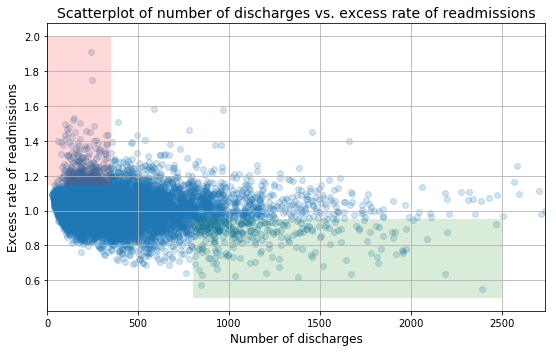

In [5]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
<div class="span5 alert alert-info">
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
</div>
****

The problem with these results is that they are statistically ambiguous. It is hard to know exactly what to make of the graph. The trend line does seem to lapse down, but the parts of the graph in the red and green are not unambiguosly so. Morevoer, the vast majority of the points are between 0.8 and 1.2, and between 0 and 1000. The basic assumptions made about the plot are not obvious, and these visual intuitions need to be clarified based on statistical tests.

The statistics section is particularly misleading, as it focuses on just two bands of the population of hospital readmission rates, and uses that to justify picking 300 as the cutoff point. The analysis offers no statistical reasoning for picking 300, focusing instead on a rhetoric of small capacities vs. large capacities. This could indeed be correct, but there is not sufficient justification for it. In my analysis, I will make several different bands in the hospital population and use t tests to determine where (if at all) there is a statistically significant difference between the different types of hospital readmission rates, classifying them based on the number of discharges they have. 

In [6]:
df=clean_hospital_read_df
df["Number of Discharges"]=df["Number of Discharges"].astype(float)
df=df[df["Number of Discharges"]> 0]
df["Excess Readmission Ratio"]=df["Excess Readmission Ratio"].astype(float)

C:\Users\test\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [7]:
df_100=df[df["Number of Discharges"]<100]
df_200 = df[(df["Number of Discharges"]> 100) & (df["Number of Discharges"] < 200)]
df_300= df[(df["Number of Discharges"]> 200) & (df["Number of Discharges"] < 300)]
df_under_300=df[df["Number of Discharges"]<300]
df_1000=df[df["Number of Discharges"]>1000]
df_midrange= df[(df["Number of Discharges"]> 500) & (df["Number of Discharges"] < 1000)]
df_300_1000=df[(df["Number of Discharges"]> 300) & (df["Number of Discharges"] < 1000)]
df_over_300=df[df["Number of Discharges"]>300]  #creating a bunch of dataframes to compare results

The first statistical test checks out the relationship of hospitals < 300 discharges to hospitals with > 300 discharges.

In [8]:
stats.ttest_ind(df_under_300["Excess Readmission Ratio"], df_over_300["Excess Readmission Ratio"])

Ttest_indResult(statistic=8.4232423622228545, pvalue=4.0973935567319209e-17)

There does seem to be a statistically significant difference between the two populations, such that a central claim of the analysis is statistically verifiable. The next section briefly the lengths and means of the two relevant sections of the dataframe.

0.9997810438024227
1.0142382121807445
5365
6108


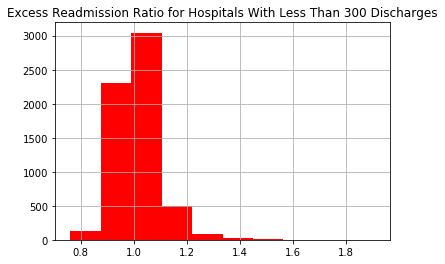

In [15]:
print(df_over_300["Excess Readmission Ratio"].mean())
print(df_under_300["Excess Readmission Ratio"].mean())
print(len(df_over_300))
print(len(df_under_300))
df_under_300["Excess Readmission Ratio"].hist(color="r")
plt.title("Excess Readmission Ratio for Hospitals With Less Than 300 Discharges")

However, the exact statistical significance of each delineations is unclaer. In the next cell,  I test whether 100,200, and 300 are significantly different from hospitals with over 300 discharage, and whether they are different from each other.

In [10]:
stats.ttest_ind(df_100["Excess Readmission Ratio"], df_over_300["Excess Readmission Ratio"])
stats.ttest_ind(df_200["Excess Readmission Ratio"], df_over_300["Excess Readmission Ratio"])
stats.ttest_ind(df_300["Excess Readmission Ratio"], df_over_300["Excess Readmission Ratio"])
print(stats.ttest_ind(df_100["Excess Readmission Ratio"], df_200["Excess Readmission Ratio"]))
print(stats.ttest_ind(df_100["Excess Readmission Ratio"], df_300["Excess Readmission Ratio"]))
print(stats.ttest_ind(df_300["Excess Readmission Ratio"], df_200["Excess Readmission Ratio"]))
#lots of t-tests

Ttest_indResult(statistic=4.0176224313770597, pvalue=5.99024219366176e-05)
Ttest_indResult(statistic=3.255312141978822, pvalue=0.0011439615158123442)
Ttest_indResult(statistic=0.45823969950630261, pvalue=0.64680076310598267)


Hospitals with < 100 patients discharged do have a higher excess readmission ratio than those with < 200 and < 300 patients. The < 100 hospitals' excess readmission ratio suggests that policy makers might need to focus on this specific set of smaller hospitals. 

1.0226183501683506
1.0118681143281363
1.013026759259259
1.01775


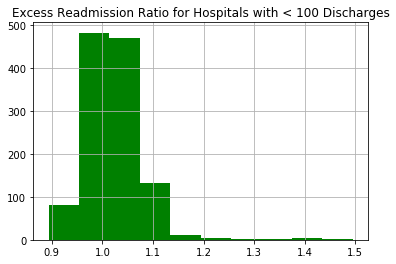

In [17]:
print(df_100["Excess Readmission Ratio"].mean())
print(df_200["Excess Readmission Ratio"].mean())
print(df_300["Excess Readmission Ratio"].mean())
print(df_100["Excess Readmission Ratio"].median())
df_100["Excess Readmission Ratio"].hist(color="g") #some means
plt.title("Excess Readmission Ratio for Hospitals with < 100 Discharges")

The larger capacity hospitals also have some statistically significant differences from each other. The range of  < 300 to < 1000, as well as the < 500 to < 1000 discharge hospitals, have a higher excess readmission ratio than >1000 discharge hospitals.

In [12]:
print(stats.ttest_ind(df_300_1000["Excess Readmission Ratio"], df_1000["Excess Readmission Ratio"]))
print(stats.ttest_ind(df_midrange["Excess Readmission Ratio"], df_1000["Excess Readmission Ratio"]))

Ttest_indResult(statistic=4.77891689466525, pvalue=1.8094592640826414e-06)
Ttest_indResult(statistic=3.793615397556132, pvalue=0.0001518516001543531)


Note the difference in the means, as the 300-1000 range is quite a bit higher than 500-1000 (here labeled as midrange). 

0.9783354211663071
1.0018115078555396
0.9991401681457286


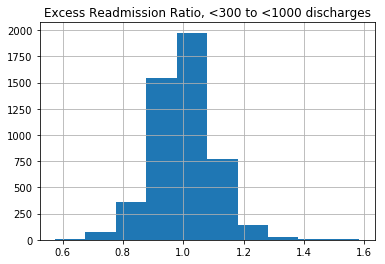

In [25]:
print(df_1000["Excess Readmission Ratio"].mean())
print(df_300_1000["Excess Readmission Ratio"].mean())
print(df_midrange["Excess Readmission Ratio"].mean())
df_300_1000["Excess Readmission Ratio"].hist()
plt.title("Excess Readmission Ratio, <300 to <1000 discharges")

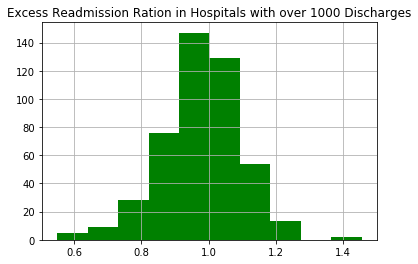

In [27]:
df_1000["Excess Readmission Ratio"].hist(color="green")
plt.title("Excess Readmission Ration in Hospitals with over 1000 Discharges")

It seems from this analysis that hospitals > 1000 discharges are holding down excess readmissions, and are worthy of further study in their own right. 

# Conclusions

* Important parts of the previous statistical analysis hold up, although they lack nuance.
* < 300 discharges in a hospital seems to be an important threshold, after which the excess readmission ratio hovers around 1.
* Hospitals that discharge < 200 and < 300 individuals also have a significant excess readmission ratio, but not as high as hospitals that discharge < 100 individuals. The mean and median for < 100 discharge hospitals is 1.022 and 1.0178 respectively, suggesting that high ratio is not produced by outliers, but reflective of these hospitals in particular. This research suggests that there seems to be some systemic feature that drives readmissions, and indeed, perhaps they should be consolidated.
* Hospitals between 300 and 1000 discharges have readmission ratios that hover just below 1, and tend to drop as the capacity increases. This effect is more noticeable with discharges > 1000, suggesting that bigger hospitals seem to have found some method to reduce their excess readmission ratio. 
* In broad strokes, the analysis presented above was correct. However, it needed to bring some statistical certainty to its scatterplot, which did not provide a sufficient level of detail or statistical certainity to make the arguments that were made above.
